In [ ]:
import numpy as np
import pandas as pd

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from mads_telemarketing_assignment.config import (
    DATA_FILENAME,
    PROCESSED_DATA_DIR,
)

In [3]:
# Various variables used in the code
random_state = 42

In [4]:
# Load  processed dataset
df = pd.read_csv(PROCESSED_DATA_DIR / DATA_FILENAME)

In [5]:
# Define X and y for modeling
X = df.drop(columns=["y"], axis=1)
y = df["y"]

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (27655, 16), y shape: (27655,)


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=random_state,
    shuffle=True,
    test_size=0.2,  # 20% of the data for testing
)

# Convert to numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [7]:
# Transform features to prepare for modelling
transformer = ColumnTransformer(
    [
        (
            "categorical",
            OneHotEncoder(
                sparse_output=False,
                handle_unknown="ignore",
            ),
            [
                "contact",
                "day_of_week",
                "default",
                "education",
                "housing",
                "job",
                "loan",
                "marital",
                "month",
            ],
        ),
    ],
    remainder=MinMaxScaler(),
)
X_train_transformed = transformer.fit_transform(X_train)

In [21]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=random_state)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

print(f"X_train_balanced shape: {X_train_balanced.shape}, y_train_balanced shape: {y_train_balanced.shape}")

X_train_balanced shape: (42170, 54), y_train_balanced shape: (42170,)


In [25]:
classifier = LogisticRegression(random_state=random_state)
model_name = "Logistic Regression"

In [26]:
# Define dictionary to store results of each classifier
probabilities = {}
predictions = {}

# Prepare an array to store predictions for all training samples
y_probs = np.zeros(len(y_train_balanced))
y_preds = np.zeros(len(y_train_balanced))

# Fit the pipeline on the training fold
classifier.fit(X_train_balanced, y_train_balanced)

# Transform the test set
X_test_transformed = transformer.transform(X_test)

# Make and store probabilities and predictions for the test fold
y_probs = classifier.predict_proba(X_test_transformed)[:, 1]
y_preds = classifier.predict(X_test_transformed)

print("✅ Modelling completed.")

✅ Modelling completed.


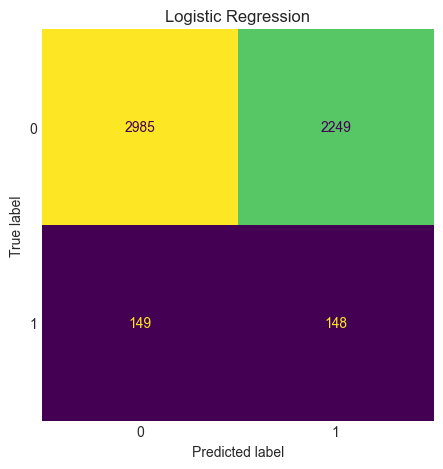

In [27]:
plt.style.use("seaborn-v0_8-dark")

_, ax = plt.subplots()

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_preds,
    ax=ax,
    colorbar=False,
)
ax.set_title(model_name)

plt.tight_layout()
plt.show()